# GROUP-3
#MD Fakrul Islam (613839)
#Adama Daffeh (613827) 
#Raj Kumar Thapa (613819)
#Adane Nigus (112351) 

In [11]:
import os

IMAGE_Files_EarlyBlight = []
IMAGE_Files_LateBlight = []
IMAGE_Files_Healthy = []

for x in os.listdir('./Data/Potato/color/EarlyBlight/'):
    if x.endswith(".JPG"):
        IMAGE_Files_EarlyBlight.append('./Data/Potato/color/EarlyBlight/'+x)
      
        
for x in os.listdir('./Data/Potato/color/LateBlight/'):
    if x.endswith(".JPG"):
        IMAGE_Files_LateBlight.append('./Data/Potato/color/LateBlight/'+x)
        
 
for x in os.listdir('./Data/Potato/color/Healthy/'):
    if x.endswith(".JPG"):
        IMAGE_Files_Healthy.append('./Data/Potato/color/Healthy/'+x)
        
print(len(IMAGE_Files_EarlyBlight))
print(len(IMAGE_Files_LateBlight))
print(len(IMAGE_Files_Healthy))

1501
2629
152


In [12]:
Merged_Dataset = IMAGE_Files_EarlyBlight + IMAGE_Files_LateBlight + IMAGE_Files_Healthy
print(Merged_Dataset[0:10])

len(Merged_Dataset)


['./Data/Potato/color/EarlyBlight/AUG__POTATO_EB_0.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_1.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_10.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_100.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_101.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_102.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_103.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_104.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_105.JPG', './Data/Potato/color/EarlyBlight/AUG__POTATO_EB_106.JPG']


4282

In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.ndimage import correlate1d
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage import uniform_filter1d
from scipy.ndimage import minimum_filter1d
from scipy.ndimage import maximum_filter1d
from scipy.ndimage import sobel, generic_gradient_magnitude
from skimage.filters.rank import entropy
from skimage.morphology import disk
from scipy.ndimage import convolve1d
from sklearn.preprocessing import MinMaxScaler
from functools import reduce
from operator import ixor

In [14]:
features=['convolve1d','entropy',
'standard_deviation','Canny','prewitt','percentile_filter',
'fourier_ellipsoid','fourier_uniform','fourier_gaussian',
'generic_gradient_magnitude','minimum_filter1d','maximum_filter1d','uniform_filter1d', 
'gaussian_filter1d_x','gaussian_filter1d_y','gaussian_filter1d_z','correlate1df',
'convolve_constant_k1', 'convolve_constant_k2', 'convolve_constant_k3', 
'convolve_reflect_k1',  'convolve_reflect_k2' , 'convolve_reflect_k3',
'convolve_nearest_k1',  'convolve_nearest_k2',  'convolve_nearest_k3',
'convolve_wrap_k1',     'convolve_wrap_k2',     'convolve_wrap_k3',
'convolve_mirror_k1',   'convolve_mirror_k2',   'convolve_mirror_k3', 
'outcome']

values = []

k1 = np.array([[1,1,1],[1,1,0],[1,0,0]])
k2  = np.array([[0,1,0],[0,1,0],[0,1,0]])
k3  = np.array([[1,0,0],[0,1,0],[0,0,1]])

img = cv2.imread(Merged_Dataset[3])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

(32, 32)


In [15]:
def gabor_filters(img, arr):
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
                    gabor_label = 'Gabor' + str(num)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)   
                    result = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                    arr = np.append(arr, np.array(result.flatten()), axis=0)
                    num += 1 
                    #print(fimg.flatten())
    return arr

In [16]:
features = {}

convolve_constant_k1 = []
convolve_constant_k2 = []
convolve_constant_k3 = []

convolve_reflect_k1  = []
convolve_reflect_k2  = []
convolve_reflect_k3  = []

convolve_nearest_k1  = []
convolve_nearest_k2  = []
convolve_nearest_k3  = []

convolve_wrap_k1     = []
convolve_wrap_k2     = []
convolve_wrap_k3     = []

convolve_mirror_k1   = []
convolve_mirror_k2   = []
convolve_mirror_k3   = []

gaussian_filter1d_x  = []
gaussian_filter1d_y  = []
gaussian_filter1d_z  = []

convolve1dl          = []
entropyl             = []
standard_deviationl  = []
Cannyl               = []
prewittl             = []
percentile_filterl   = []
fourier_ellipsoidl   = []
fourier_uniforml     = []
fourier_gaussianl    = []
generic_gradient_magnitudel = []
minimum_filter1dl    = []
maximum_filter1dl    = []
uniform_filter1dl    = []
correlate1df         = []

outcome              = []


In [17]:
IMG_WIDTH, IMG_HEIGHT = (32, 32)

#sample = Merged_Dataset[0:5000]

X = []
Y = []

In [18]:
#for each_image in sample:
for each_image in Merged_Dataset:
    img = cv2.imread(each_image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv2.INTER_AREA)  
    
    arr = np.array([])
    
    result = convolve1d(img, mode = 'nearest' ,weights=[1, 3], cval=0.75)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = entropy(img, disk(1))
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = cv2.Canny(img, 100,200)
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.prewitt(img)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = ndimage.percentile_filter(img, percentile=20, size=50)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = ndimage.fourier_ellipsoid(img, size=25)
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.fourier_uniform(img, size=20)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = ndimage.fourier_gaussian(img, sigma=4) 
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = generic_gradient_magnitude(img, sobel)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
        
    result=minimum_filter1d(img, size=3)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = maximum_filter1d(img, size=3)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = uniform_filter1d(img, size=3)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result   = gaussian_filter1d(img, 1)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = gaussian_filter1d(img, 2)
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = gaussian_filter1d(img, 3)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = correlate1d(img, [-1, 1])    
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = ndimage.convolve(img, k1, mode='constant', cval=0.0) 
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k2, mode='constant', cval=0.0)    
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k3, mode='constant', cval=0.0)    
    arr = np.append(arr, np.array(result.flatten()), axis=0)    
    
    result = ndimage.convolve(img, k1, mode='reflect',  cval=0.5) 
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k2, mode='reflect',  cval=0.5) 
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k3, mode='reflect',  cval=0.5) 
    arr = np.append(arr, np.array(result.flatten()), axis=0)
        
    result = ndimage.convolve(img, k1, mode='nearest',  cval=1.0)
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = ndimage.convolve(img, k2, mode='nearest',  cval=1.0)
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k3, mode='nearest', cval=1.0) 
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k1, mode='wrap', cval=1.5) 
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    result = ndimage.convolve(img, k2, mode='wrap',   cval=1.5)
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k3, mode='wrap', cval=1.5)  
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k1, mode='mirror', cval=2.0)   
    arr = np.append(arr, np.array(result.flatten()), axis=0)

    result = ndimage.convolve(img, k2, mode='mirror', cval=2.0)    
    arr = np.append(arr, np.array(result.flatten()), axis=0)    

    result = ndimage.convolve(img, k3, mode='mirror', cval=2.0)    
    arr = np.append(arr, np.array(result.flatten()), axis=0)
    
    arr = gabor_filters(img, arr)
    
    X.append(arr)
    
    if 'EB' in each_image:
        Y.append(1)
    if 'LB' in each_image:
        Y.append(2)
    if 'HL' in each_image:
        Y.append(0)        

In [19]:
print(len(X))
print(len(Y))

print(X[0])
print(len(X[0]))
print(Y[0])

4282
4282
[22. 13. 13. ... 89. 79. 53.]
64512
1


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import time
from sklearn import svm
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state = 150)

In [21]:
classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

start = time.time()
classifier.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = classifier.predict(X_test)
end = time.time()
pred_time = (end - start)


print('Performence of KNeighborsClassifier')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('fit time: ',fit_time)
print('pred_time: ',pred_time)
print('Classification Report:' ) 
print(classification_report(y_test, y_pred))
print('Confusion Matrix:' ) 
print(confusion_matrix(y_test, y_pred))

Performence of KNeighborsClassifier
Accuracy:  0.7750972762645915
fit time:  1.6600286960601807
pred_time:  207.9293966293335
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.24      0.20        37
           1       0.95      0.49      0.64       446
           2       0.77      0.96      0.85       802

    accuracy                           0.78      1285
   macro avg       0.63      0.56      0.57      1285
weighted avg       0.81      0.78      0.76      1285

Confusion Matrix:
[[  9   2  26]
 [ 22 217 207]
 [ 22  10 770]]


In [31]:
rf = RandomForestClassifier(n_estimators=90, max_depth=300, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test)
end = time.time()
pred_time = (end - start)


print('Performence of RandomForestClassifier')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('fit time: ',fit_time)
print('pred_time: ',pred_time)
print('Classification Report:' ) 
print(metrics.classification_report(y_test, y_pred))
print('Confusion Matrix:' ) 
print(confusion_matrix(y_test, y_pred))

Performence of RandomForestClassifier
Accuracy:  0.8871595330739299
fit time:  11.517104148864746
pred_time:  1.2119314670562744
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.88      0.86      0.87       446
           2       0.89      0.94      0.92       802

    accuracy                           0.89      1285
   macro avg       0.59      0.60      0.60      1285
weighted avg       0.86      0.89      0.87      1285

Confusion Matrix:
[[  0   8  29]
 [  0 385  61]
 [  0  47 755]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#SVM
start = time.time()
clf = svm.SVC()
clf.fit(X_train,y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = clf.predict(X_test)
end = time.time()
pred_time = (end - start)

print('Performence of SVM Classifier')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('fit time: ',fit_time)
print('pred_time: ',pred_time)
print('Classification Report:' ) 
print(metrics.classification_report(y_test, y_pred))
print('Confusion Matrix:' ) 
print(confusion_matrix(y_test, y_pred))

Performence of SVM Classifier
Accuracy:  0.8988326848249028
fit time:  159.18961596488953
pred_time:  151.50379180908203
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.89      0.88      0.89       446
           2       0.90      0.95      0.93       802

    accuracy                           0.90      1285
   macro avg       0.60      0.61      0.60      1285
weighted avg       0.87      0.90      0.89      1285

Confusion Matrix:
[[  0   7  30]
 [  0 392  54]
 [  0  39 763]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.tree import DecisionTreeClassifier
clf_Decision = DecisionTreeClassifier(criterion="gini", max_depth=300, min_samples_leaf=5)   
start = time.time()
clf_Decision.fit(X_train,y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = clf_Decision.predict(X_test)
end = time.time()
pred_time = (end - start)

print('Performence of DecisionTree Classifier')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('fit time: ',fit_time)
print('pred_time: ',pred_time)
print('Classification Report:' ) 
print(metrics.classification_report(y_test, y_pred))
print('Confusion Matrix:' ) 
print(confusion_matrix(y_test, y_pred))

Performence of DecisionTree Classifier
Accuracy:  0.8178988326848249
fit time:  75.39749646186829
pred_time:  0.2265303134918213
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.11      0.10        37
           1       0.80      0.78      0.79       446
           2       0.87      0.87      0.87       802

    accuracy                           0.82      1285
   macro avg       0.59      0.59      0.59      1285
weighted avg       0.82      0.82      0.82      1285

Confusion Matrix:
[[  4  11  22]
 [ 15 349  82]
 [ 27  77 698]]


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.DataFrame(
    {'Classifier': ["KNeighbors", "DecisionTree", "SVM", "RandomForest"], 
     'Accuracy': [67, 72, 85, 86],
     'Precision': [71,70,85,86],
     'Recall': [69,70,83,85],
     'F1-Score': [80,70,84,86],
    })
df.columns = ['Classifier', 'Accuracy','Precision','Recall', 'F1-Score']
print(df)

     Classifier  Accuracy  Precision  Recall  F1-Score
0    KNeighbors        67         71      69        80
1  DecisionTree        72         70      70        70
2           SVM        85         85      83        84
3  RandomForest        86         86      85        86


Text(0.5, 0.98, 'Model Performence using 32*32 Images')

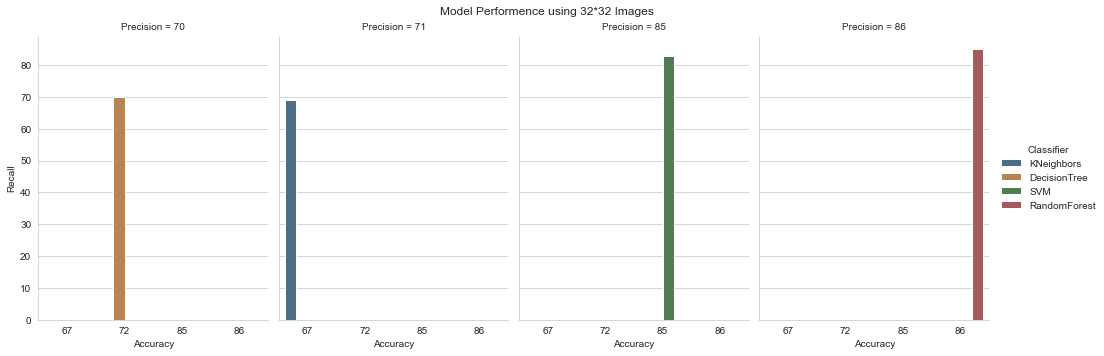

In [29]:
sns.set_style("whitegrid")
g = sns.catplot(x="Accuracy", hue="Classifier", col="Precision",
                data=df, y="Recall", kind="bar", saturation=.40, aspect=.70, height=5
                );

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Model Performence using 32*32 Images')